In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NB28149\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NB28149\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
api_key = "dzPfHbw07mHlxqWrbFXPnJ83R"
api_secret = "8lAhud69E2748mdv8eKpsRf2lwDWlBVDk8YMxjxrGLRCfhppTj"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAEHZbwEAAAAAAWZ%2FmsJH42PgVE44JaUqw8spT6M%3DDczwilpVRZtjfpRPK6l6TSjTB6l9EXAsVqVafUCabWoNLNDeh9"
acess_token = "2534496417-9rOsCGmGMi9R9kfzifhqJrzP0YxX4ejBgTu3tnf"
acess_secret = "ccLadXKnmQme8WuUIPsP3X7CUn9WvPFk56uCHWHDq6H76"

In [63]:
client = tweepy.Client(bearer_token=bearer_token)

In [68]:
query = '''ireland milk -is:retweet lang:en'''
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["geo", "text", "source", "context_annotations"],
                                     user_fields = ["location"],
                                     max_results = 100,
                                     )

In [71]:
tweets_ireland = {}
tweets_ireland["tweet"] = []
for tweet in tweets.data:
    tweets_ireland["tweet"].append(tweet.text)

In [74]:
df_ireland = pd.DataFrame(tweets_ireland)

In [77]:
df_ireland["tweet"] = df_ireland["tweet"].str.replace("\n","")

In [78]:
query = '''us milk -is:retweet lang:en'''
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["geo", "text", "source", "context_annotations"],
                                     user_fields = ["location"],
                                     max_results = 100,
                                     )

In [79]:
tweets_us = {}
tweets_us["tweet"] = []
for tweet in tweets.data:
    tweets_us["tweet"].append(tweet.text)

In [80]:
df_us = pd.DataFrame(tweets_us)

In [81]:
df_us["tweet"] = df_us["tweet"].str.replace("\n","")

In [44]:
df = pd.read_csv('clothing_review.csv')

In [45]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

In [46]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [47]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

In [48]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [49]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [50]:
df['review'] = df['Review Text'].apply(get_text_processing)

In [51]:
df = df[['review', 'Polarity_Rating']]

In [52]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df_ = df.copy()
df_.drop(['Polarity_Rating'],axis=1,inplace=True)
df_ = pd.concat([df,one_hot],axis=1)

In [100]:
df_

,review,Polarity_Rating,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,Positive,0,0,1
1,Love dress sooo pretty happened find store im ...,Positive,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,Positive,0,0,1
4,shirt flattering due adjustable front tie perf...,Positive,0,0,1
6,aded basket hte last mintue see would look lik...,Positive,0,0,1
...,...,...,...,...,...
20205,Love silhouette coziness fabric first wearings...,Negative,1,0,0
22885,Bummer loved lacy bell arms everything look sw...,Negative,1,0,0
20874,Alas wanted love photos models wearing look go...,Negative,1,0,0
20240,ginormous shapeless shirt runs extremely large...,Negative,1,0,0


In [53]:
X = df_['review'].values
y = df_.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [94]:
vect = CountVectorizer(max_features=5000)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [95]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [14]:
model = Sequential()

model.add(Dense(units=5000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [15]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 14s 202ms/step - loss: 0.7616 - accuracy: 0.6464 - val_loss: 0.4717 - val_accuracy: 0.8143
Epoch 2/100
66/66 [==============================] - 14s 210ms/step - loss: 0.2760 - accuracy: 0.9070 - val_loss: 0.3133 - val_accuracy: 0.8971
Epoch 3/100
66/66 [==============================] - 15s 222ms/step - loss: 0.0779 - accuracy: 0.9785 - val_loss: 0.3366 - val_accuracy: 0.9087
Epoch 4/100
66/66 [==============================] - 14s 219ms/step - loss: 0.0217 - accuracy: 0.9945 - val_loss: 0.3899 - val_accuracy: 0.9140
Epoch 00004: early stopping


In [16]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 [==============================] - 3s 30ms/step - loss: 0.3899 - accuracy: 0.9140
Test accuracy: 0.914027750492096


In [18]:
sid = SentimentIntensityAnalyzer()

In [43]:
df

,review
0,Absolutely wonderful silky sexy comfortable
1,Love dress sooo pretty happened find store im ...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...
6,aded basket hte last mintue see would look lik...
...,...
6878,pants look beautiful first see goes downhill w...
17451,looking offwhite vest thought one would perfec...
97,excited order top red xs cute huge shapeless s...
18181,petite ordered size small came looking like gy...


In [55]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
X_test

array(['price amazing goes everything fits great glad made purchase',
       'disappointment beautiful fabrics interesting design rarityand especially length unfortunately mess terms proportions size 2 barely get design flaw sadly fit strange seem simply sizing would correct flaws',
       'sure going love dress saw rack disappointed poofy bottom flattering id love see pattern back better fit',
       ...,
       'loved look sweater workmanship surprisingly poor missed stitches loose threads throughout even tag sewn outside retailer great return really wanted keep disappointed',
       'purchased dress 50th birthday bash stunning fit perfect buy size could worn regular size incredibly flattering elegant well made one go black dresses summer',
       'great dark wash fit true size every stevies reference 56 145lbs size 6m 29 fit perfect bit long fold looks cute highly recommend especially since sale definitely closet staple'],
      dtype=object)

In [24]:
results = []
for text in X_test:
    result = sid.polarity_scores(text)["compound"]
    if result < -0.05:
        results.append("Negative")
    elif result < 0.05:
        results.append("Neutral")
    else:
        results.append("Positive")

In [25]:
results = np.array(results)

In [56]:
y_test

array([['Positive'],
       ['Negative'],
       ['Negative'],
       ...,
       ['Negative'],
       ['Positive'],
       ['Positive']], dtype=object)

In [57]:
accuracy_score(y_test,results)

0.38263888888888886

In [83]:
df_ireland['tweet'] = df_ireland['tweet'].apply(get_text_processing)
df_us['tweet'] = df_us['tweet'].apply(get_text_processing)

In [84]:
df_ireland

,tweet
0,DavidGHFrost trussliz FCdO sure dairy farmers ...
1,Balor evil eye stole cow Goibnui smithGive bac...
2,SarahFourL PrayForPatrick Growing rural Irelan...
3,Reading Ireland wants bring potato milk gotta ...
4,PaulineOHara12 Luca31404488 8 square plain Dai...
...,...
95,rather deported Rwanda illegals want go anothe...
96,NoSeaBorderNI EricDaw12617509 Peston MarosSefc...
97,NI agrifood cant survive hard Irish border wou...
98,Northern Ireland accept Rule another country U...


In [96]:
vec_ireland = vect.transform(df_ireland['tweet'])
vec_us = vect.transform(df_us['tweet'])

In [97]:
vec_ireland = tfidf.transform(vec_ireland)
vec_us = tfidf.transform(vec_us)
vec_ireland = vec_ireland.toarray()
vec_us = vec_us.toarray()

In [101]:
df_ireland["sentiment"] = np.argmax(model.predict(vec_ireland),axis=1)

In [104]:
def number_to_sentiment(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    return "Positive"

In [106]:
df_ireland["sentiment"] = df_ireland["sentiment"].apply(number_to_sentiment)

In [107]:
df_us["sentiment"] = np.argmax(model.predict(vec_us),axis=1)
df_us["sentiment"] = df_us["sentiment"].apply(number_to_sentiment)

<AxesSubplot:>

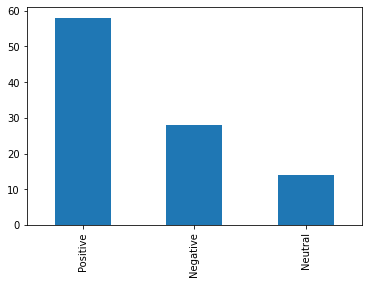

In [113]:
df_ireland["sentiment"].value_counts().plot.bar()

<AxesSubplot:>

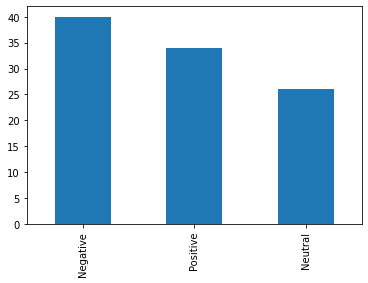

In [114]:
df_us["sentiment"].value_counts().plot.bar()